<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
</center>
<center>Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center> Capstone проект №1. Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

<font color='red'>**Задание:**</font> заполните код в этой тетрадке и выберите ответы в [веб-форме](https://docs.google.com/forms/d/13ZnT7w7foHD0uw0ynTtj7atdiCGvlltF8ThhbJCvLsc). 


## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
import pickle
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = '~/capstone_user_identification'

In [9]:
def prepare_train_set_with_shift(path_to_csv_files, sitesdat, session_length=10, shift_length = 10):
    files = os.listdir(path_to_csv_files)
    sites = []
    for j in range(1, session_length+1):
        sites.append('site' + str(j))
    #print(sites)
    res = []
    keyid = 1
    dats = []
    for afile in files:
        if 'user' in afile:
            fileid = int(afile[4:8])
            dat = pd.read_csv(path_to_csv_files + '\\' + afile)
            dat.timestamp = pd.to_datetime(dat.timestamp)
            dat['id'] = dat.index
            dat = dat.sort_values(['timestamp', 'id'])
            dat['fileid'] = fileid
            dats.append(dat)
    dat = pd.concat(dats, ignore_index=True)
    #print('joined data')
    dat = dat.merge(sitesdat, left_on = 'site', right_on = 'site')
    #print('formed dictionary')
    #print(len(dat))
    for afileid in dat.fileid.unique():
        datred = dat[dat.fileid == afileid]
        datred = datred.sort_values(['timestamp_x', 'id'])
        datred.reset_index(drop = True, inplace = True)
        #print(afileid)
        mycols = []
        for j in range(session_length):
            if j < len(datred):
                acol = (datred.ix[j:len(datred):shift_length, 'keyid'].values).tolist()
            else:
                acol = [0]
            if j==0:
                initlen = len(acol)
                mycols.append(acol)
            else: 
                if initlen > len(acol):
                    mycols.append(acol + [0]*(initlen-len(acol)))
                else:
                    mycols.append(acol)
        mycols.append([afileid]*initlen)
        tempres = pd.DataFrame(mycols).transpose()
        tempres.columns = sites + ['user_id']
        res.append(tempres)
    res = pd.concat(res, ignore_index = True)
    res['session_id'] = res.index
    return(res, sitesdat)    

def SparseMatrixMakerAlt(dat):
    sitedat = dat.drop(['user_id', 'session_id'], axis=1)
    #print(len(sitedat))
    indices = []
    datas = []
    indptrs = [0]
    mylen = len(sitedat.columns)
    for j in range(len(dat)):
        #if j % 1000 == 0:
            #print(j)
        indices.extend((sitedat.iloc[j].values))
        datas.extend((np.repeat(1, mylen)))
        indptrs.append(len(indices))
    return(csr_matrix((datas, indices, indptrs), dtype = int))

In [10]:
def main_prepare_trainset(path_to_csv_files, path_to_sitedat, session_length, shift_length):
    sitesdat = pd.read_csv(path_to_sitedat, sep = ';')
    dat = prepare_train_set_with_shift(path_to_csv_files, sitesdat, session_length, shift_length)
    sparsedat = SparseMatrixMakerAlt(dat[0])
    return(sparsedat, dat[0], dat[1])

In [5]:
rrr = main_prepare_trainset('D:/capstone_user_identification/3users/', 'sites3.csv', 10, 10)

In [8]:
rrr[0].todense(), rrr[1]

(matrix([[0, 1, 3, 0, 1, 0, 1, 1, 1, 1, 1, 0],
         [6, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
         [5, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0],
         [0, 4, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1],
         [7, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]),
    site1  site2  site3  site4  site5  site6  site7  site8  site9  site10  \
 0      4      2      2      9      2      1      7      6      8      10   
 1      4      1      1      1      0      0      0      0      0       0   
 2      4      2      5      5      2      0      0      0      0       0   
 3      3      1      2      1      2      1      1      6     11       3   
 4      3      1      2      0      0      0      0      0      0       0   
 
    user_id  session_id  
 0        1           0  
 1        1           1  
 2        2           2  
 3        3           3  
 4        3           4  )

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [87]:
rrr = main_prepare_trainset('D:/capstone_user_identification/3users/', 'sites3.csv', 5, 3)

In [88]:
print(rrr[0].todense().shape)
(rrr[1].user_id)

(12, 12)


0     1
1     1
2     1
3     1
4     1
5     2
6     2
7     3
8     3
9     3
10    3
11    3
Name: user_id, dtype: int64

In [8]:
X_toy_s5_w3.todense()

matrix([[0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0],
        [3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [9]:
y_s5_w3

array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3])

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [11]:
#%%time
import itertools
import pickle
#
#data_lengths = []
#
sparses = []
matrs = []
counter = 1
for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length:
            if num_users == 10:
                rrr = main_prepare_trainset('D:/capstone_user_identification/10users/', 'sites10.csv', session_length, window_size)
            elif num_users == 150:
                rrr = main_prepare_trainset('D:/capstone_user_identification/150users/', 'sites150.csv', session_length, window_size)
            print(num_users, window_size, session_length) 
            counter += 1
            print(len(rrr[1]))
            pickle.dump(rrr[0], open( "save" + str(counter) + '.p', "wb" ) )
            pickle.dump(rrr[1]['user_id'], open( "saveuser" + str(counter) + '.p', "wb" ) )
            #print(rrr[0].todense().shape, num_users, window_size, session_length)
            #sparses = sparses.append(rrr[0])
            #matrs = matrs.append(rrr[1])

10 10 15
14061
10 10 10
14061
10 7 15
20087
10 7 10
20087
10 7 7
20087
10 5 15
28118
10 5 10
28118
10 5 7
28118
10 5 5
28118
150 10 15
137019
150 10 10
137019
150 7 15
195712
150 7 10
195712
150 7 7
195712
150 5 15
273957
150 5 10
273957
150 5 7
273957
150 5 5
273957


(91366, 27798)

**<font color='red'> Вопрос 1. </font>Сколько всего уникальных значений в списке `data_lengths`?**

In [9]:
''' ВАШ КОД ЗДЕСЬ '''

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [2]:
import pandas as pd

train_df = pd.read_csv('train10.csv', sep = ';', 
                       index_col='session_id')

In [3]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,
0,193,586,133,3,133,133,3,133,204,133,31
1,421,192,675,254,133,31,398,3925,218,55,31
2,55,3,55,55,5,295,421,338,904,55,31
3,477,4731,477,55,55,55,55,976,199,123,31
4,342,55,5,3921,259,211,3818,2113,699,2113,31


In [92]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
site1      14061 non-null int64
site2      14061 non-null int64
site3      14061 non-null int64
site4      14061 non-null int64
site5      14061 non-null int64
site6      14061 non-null int64
site7      14061 non-null int64
site8      14061 non-null int64
site9      14061 non-null int64
site10     14061 non-null int64
user_id    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [96]:
train_df['user_id'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_id, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [5]:
import numpy as np
num_unique_sites = [len(np.unique(train_df.iloc[i,0:10])) for i in range(0, len(train_df))]

In [98]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

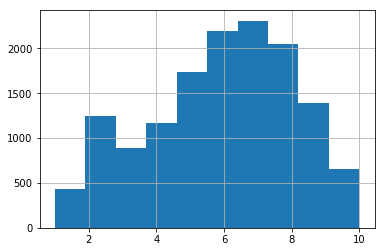

In [99]:
pd.Series(num_unique_sites).hist();

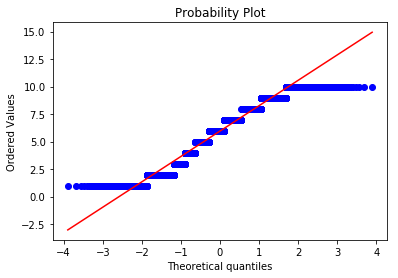

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [6]:
import scipy.stats as stats
import pylab 
stats.probplot(num_unique_sites, dist="norm", plot=pylab)
pylab.show()
hhh = stats.shapiro(num_unique_sites)

In [7]:
hhh

(0.9546933174133301, 0.0)

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально**

In [111]:
num_unique_sites[0:10]

[5, 10, 7, 6, 9, 8, 7, 8, 8, 7]

**<font color='red'> Вопрос 2. </font>Распределено ли нормально число уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов (согласно критерию Шапиро-Уилка)?**

In [ ]:
''' ВАШ КОД ЗДЕСЬ '''

**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

**<font color='red'> Вопрос 3. </font>Каково p-value при проверке описанной гипотезы?**

In [112]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')

In [115]:
stats.binom_test(len(has_two_similar[has_two_similar == 1]), len(has_two_similar), 0.95)

0.044183792063241377

In [117]:
import statsmodels
statsmodels.stats.proportion.binom_test(len(has_two_similar[has_two_similar == 1]), len(has_two_similar), 0.95, "larger")

0.022076537690726782

In [118]:
print(len(has_two_similar[has_two_similar == 1]), len(has_two_similar))

13410 14061


**<font color='red'> Вопрос 4. </font>Каков 95% доверительный интервал Уилсона для доли случаев, когда пользователь повторно посетил какой-то сайт (из п. 3)?**

In [121]:
wilson_interval = statsmodels.stats.proportion.proportion_confint(len(has_two_similar[has_two_similar == 1]), len(has_two_similar), method = 'wilson')

In [122]:
print('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)))

0.95 0.957


**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [123]:
site_stat  = pd.read_csv('sites10.csv', sep = ';')

In [125]:
site_stat2 = site_stat.timestamp[site_stat.timestamp >= 1000]

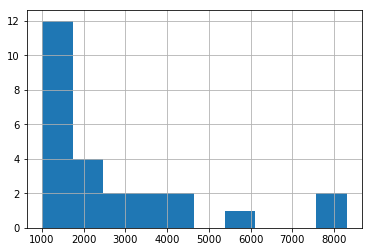

In [126]:
site_stat2.hist()

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

**<font color='red'> Вопрос 5. </font>Каков 95% доверительный интервал для средней частоты появления сайта в выборке?**

In [171]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [172]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [187]:
site_stat.timestamp.mean()

28.612660289029108

In [176]:
totlen = len(site_stat)
bootdat = get_bootstrap_samples(site_stat.timestamp.values, totlen)

In [188]:
stat = []
for j in range(len(bootdat)):
    #stat.append(len(np.unique(bootdat[j]))/len(bootdat[j]))
    stat.append(np.mean(bootdat[j]))

In [189]:
stat[0:10]

[27.891105231019743,
 24.295135355180133,
 27.0677793608793,
 27.184001628332993,
 32.174638713616936,
 28.179930795847749,
 29.914105434561368,
 27.266028902910644,
 30.302462853653573,
 25.549358843883574]

In [190]:
stat_intervals(stat, 0.05)

array([ 22.51524527,  35.76303684])

In [144]:
sitedat = []
for j in range(len(site_stat)):
    keyid = site_stat.keyid.values[j]
    reptime = site_stat.timestamp.values[j]
    print(keyid, reptime)
    sitedat.extend(np.repeat(keyid, reptime))

1 8300
2 7813
3 5441
4 4158
5 4141
6 3758
7 3244
8 3094
9 2630
10 2089
11 1939
12 1868
13 1804
14 1702
15 1493
16 1441
17 1388
18 1265
19 1232
20 1204
21 1057
22 1041
23 1039
24 1039
25 1002
26 982
27 974
28 965
29 763
30 748
31 711
32 700
33 676
34 671
35 666
36 662
37 598
38 583
39 582
40 559
41 553
42 531
43 484
44 482
45 482
46 463
47 460
48 454
49 442
50 439
51 427
52 416
53 407
54 402
55 399
56 379
57 367
58 357
59 357
60 339
61 332
62 330
63 330
64 326
65 319
66 313
67 297
68 295
69 293
70 288
71 281
72 279
73 275
74 274
75 270
76 268
77 267
78 265
79 261
80 257
81 253
82 250
83 243
84 241
85 239
86 234
87 230
88 226
89 225
90 213
91 208
92 207
93 205
94 200
95 191
96 188
97 180
98 179
99 172
100 170
101 167
102 167
103 164
104 164
105 163
106 162
107 161
108 160
109 157
110 154
111 154
112 151
113 151
114 150
115 141
116 140
117 139
118 139
119 138
120 138
121 137
122 137
123 133
124 133
125 132
126 132
127 130
128 129
129 126
130 123
131 122
132 121
133 119
134 119
135 118
136

На 3 неделе мы займемся визуальным анализом данных и построением признаков.

In [150]:
len(sitedat), totlen

(140574, 140574)

In [147]:
len(np.unique(sitedat))/len(sitedat)

0.034949563930741105

MemoryError: 

In [170]:
from sklearn.utils import resample

resvec = []
for j in range(totlen):
    sitedatalt = resample(sitedat, n_samples = len(sitedat))
    resvec.append(len(np.unique(sitedatalt))/len(sitedatalt))
    if j  % 100 == 0:
        print(j)
        print(len(sitedatalt), len(sitedat), len(np.unique(sitedat)), len(np.unique(sitedatalt)))
        print((len(np.unique(sitedatalt))/len(sitedatalt), (len(np.unique(sitedat))/len(sitedat))))




0
140574 140574 4913 4189
(0.029799251639705777, 0.034949563930741105)
100
140574 140574 4913 4156
(0.029564499836385108, 0.034949563930741105)
200
140574 140574 4913 4167
(0.029642750437491996, 0.034949563930741105)


KeyboardInterrupt: 

In [165]:
import numpy
numpy.percentile(resvec, 0.025), numpy.percentile(resvec, 0.975)
min(resvec), max(resvec)

(0.029130564684792352, 0.030467938594619205)

In [162]:
resvec[0:10]

[0.02979213794869606,
 0.02979213794869606,
 0.02979213794869606,
 0.02979213794869606,
 0.02979213794869606,
 0.02979213794869606,
 0.02979213794869606,
 0.02979213794869606,
 0.02979213794869606,
 0.02979213794869606]